In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.config('spark.driver.maxResultSize', '18g').getOrCreate()

In [0]:
pip install nltk

Python interpreter will be restarted.
Collecting nltk
 Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from nltk) (1.0.1)
Collecting click
 Using cached click-8.1.3-py3-none-any.whl (96 kB)
Collecting regex>=2021.8.3
 Using cached regex-2022.9.13-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (772 kB)
Collecting tqdm
 Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
Installing collected packages: tqdm, regex, click, nltk
Successfully installed click-8.1.3 nltk-3.7 regex-2022.9.13 tqdm-4.64.1
Python interpreter will be restarted.

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Collecting wordcloud
 Using cached wordcloud-1.8.2.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (458 kB)
Requirement already satisfied: pillow in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.20.1)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.4.2)
Requirement already satisfied: python-dateutil>=2.7 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.1)
Requirement already satisfied: pyparsing>=2.2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
Installing collected packages: wordcloud
Successfully installed wordcloud-1.8.2.2
Python interpreter will be restarted.

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords #停用词
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import string
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!

In [0]:
import re

In [0]:
def remove_upprintable_chars(s):
    
    return ''.join(x for x in s if x.isprintable())

In [0]:
# 分词操作是 word_tokenize() 之后转换成小写
def preprocess(text):
        text = re.sub('[0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+', " ", text)
        text = re.sub('[\001\002\003\004\005\006\007\n\x08\x09\x0a\x0b\x0c\x0d\x0e\x0f\x10\x11\x80\x90\x12\x13\x14\x15\x16\x17\x18\x19\x1a]+', '', text)
        tokens= word_tokenize(text)
        token_list =[remove_upprintable_chars(word.lower()) for word in tokens]
        filtered=[w for w in token_list if(w not in stopwords.words('english'))]
        
        return ' '.join(filtered)

In [0]:
from pyspark.sql.functions import lit,col
import pyspark.sql.functions as F

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [0]:
path="dbfs:/mnt/lsde/group05/comment_position/2014-2.parquet"

In [0]:
df = spark.read.load(path,format ="parquet")

In [0]:
df.show()

+---------+-------+------+-----------+
parent_id| id|result|created_utc|
+---------+-------+------+-----------+
t3_1ydewf|cfjj95q| [0.0]| 1392844492|
t3_1ycfw2|cfjjag5| [0.0]| 1392844558|
t3_1ycrt3|cfjjan6| [0.0]| 1392844568|
t3_1yb63m|cfjjbe5| [0.0]| 1392844609|
t3_1ydjc3|cfjjcvl| [0.0]| 1392844689|
t3_1ycrt3|cfjjd97| [1.0]| 1392844707|
t3_1ycgaj|cfjje1n| [0.0]| 1392844749|
t3_1ydlq4|cfjjers| [0.0]| 1392844784|
t3_1yblyi|cfjjf5w| [0.0]| 1392844804|
t3_1ybf09|cfjjfow| [1.0]| 1392844832|
t3_1ydlv3|cfjjhgt| [0.0]| 1392844926|
t3_1ydhzo|cfjjhhn| [0.0]| 1392844927|
t3_1ydlv3|cfjjihj| [0.0]| 1392844980|
t3_1ydjc9|cfjjipc| [0.0]| 1392844991|
t3_1yd8bx|cfjjivm| [1.0]| 1392844999|
t3_1ydjc3|cfjjivs| [0.0]| 1392844999|
t3_1ydfak|cfjjjil| [0.0]| 1392845031|
t3_1ydjc9|cfjjk4m| [0.0]| 1392845064|
t3_1yblyi|cfjjkbo| [1.0]| 1392845075|
t3_1ydmia|cfjjo56| [1.0]| 1392845267|
+---------+-------+------+-----------+
only showing top 20 rows

In [0]:
#0 for Ukraine 1 for Russia
def judgeAff(lst):
    aff=lst[0]
    if int(float(aff))<1:
        return 0
    else:
        return 1 

In [0]:
judgeAff_f = udf(judgeAff, IntegerType())

In [0]:
spark.udf.register(name="judgeAff_f", f=judgeAff_f)

Out[12]: <function __main__.judgeAff(lst)>

In [0]:
df_withAff = df.withColumn("aff",judgeAff_f('result'))

In [0]:
df_withAff.show()

+---------+-------+------+-----------+---+
parent_id| id|result|created_utc|aff|
+---------+-------+------+-----------+---+
t3_1ydewf|cfjj95q| [0.0]| 1392844492| 0|
t3_1ycfw2|cfjjag5| [0.0]| 1392844558| 0|
t3_1ycrt3|cfjjan6| [0.0]| 1392844568| 0|
t3_1yb63m|cfjjbe5| [0.0]| 1392844609| 0|
t3_1ydjc3|cfjjcvl| [0.0]| 1392844689| 0|
t3_1ycrt3|cfjjd97| [1.0]| 1392844707| 1|
t3_1ycgaj|cfjje1n| [0.0]| 1392844749| 0|
t3_1ydlq4|cfjjers| [0.0]| 1392844784| 0|
t3_1yblyi|cfjjf5w| [0.0]| 1392844804| 0|
t3_1ybf09|cfjjfow| [1.0]| 1392844832| 1|
t3_1ydlv3|cfjjhgt| [0.0]| 1392844926| 0|
t3_1ydhzo|cfjjhhn| [0.0]| 1392844927| 0|
t3_1ydlv3|cfjjihj| [0.0]| 1392844980| 0|
t3_1ydjc9|cfjjipc| [0.0]| 1392844991| 0|
t3_1yd8bx|cfjjivm| [1.0]| 1392844999| 1|
t3_1ydjc3|cfjjivs| [0.0]| 1392844999| 0|
t3_1ydfak|cfjjjil| [0.0]| 1392845031| 0|
t3_1ydjc9|cfjjk4m| [0.0]| 1392845064| 0|
t3_1yblyi|cfjjkbo| [1.0]| 1392845075| 1|
t3_1ydmia|cfjjo56| [1.0]| 1392845267| 1|
+---------+-------+------+-----------+---+
only showing top 20 rows

In [0]:
comment_text = spark.read.load("dbfs:/mnt/lsde/group05/filtered_comments/2014-2.parquet",format="parquet")

In [0]:
comment_text.show()

+---------+----------------+--------------------+-------+-----+---+--------------------+------------+-----------+
parent_id| author| body| id|score|ups| subreddit|subreddit_id|created_utc|
+---------+----------------+--------------------+-------+-----+---+--------------------+------------+-----------+
t3_1x76ms|BrightenthatIdea|I came here to th...|cf8qrtm| 4| 4| pics| t5_2qh0u| 1391715626|
t3_1x6p66| shortaflip|Ay make em watch ...|cf8qs0g| 1| 1| anime| t5_2qh22| 1391715635|
t3_1x6pb4| Diverskii|I'd advise everyo...|cf8qv9a| 3| 3| MapPorn| t5_2si92| 1391715825|
t3_1x68f5| holysocks|caviar is darker ...|cf8qwco| -3| -3| funny| t5_2qh33| 1391715886|
t3_1x6pb4| Asyx|Yay Grand Duchy o...|cf8qxw7| 1| 1| MapPorn| t5_2si92| 1391715975|
t3_1x76ms| ken27238|Well the Ukraine ...|cf8r2vt| 250|250| pics| t5_2qh0u| 1391716259|
t3_1x6tmj| BostonJohn17|What other good o...|cf8r336| 1| 1| AdviceAnimals| t5_2s7tt| 1391716270|
t3_1x6dyt| Syltarex|Here is a very go...|cf8r6kk| 5| 5| MorbidReality| t5_2tz1e| 1391716468|
t3_1x78a3| 4265361|Why the hell isn'...|cf8r6t5| 1| 1| beer| t5_2qhg1| 1391716482|
t3_1x7e3b| CarlosGraves|The Russian IS a ...|cf8r7t5| -3| -3|electronic_cigarette| t5_2qmlu| 1391716542|
t3_1x7f8c| SammyD1st|It's Pravda, and ...|cf8r812| 2| 2| Natalism| t5_2vp2p| 1391716555|
t3_1x6f9f|Rotandassimilate|a better question...|cf8r8lv| 54| 54| AskHistorians| t5_2ssp3| 1391716588|
t3_1x7djg| YQG|The Sopcast strea...|cf8r8o4| 5| 5| soccer| t5_2qi58| 1391716592|
t3_1x6rad| HughJorgan1986|Strongly worded l...|cf8rbtm| 3| 3| ukraine| t5_2qqcn| 1391716766|
t3_1x7djg| YQG|As someone who's ...|cf8rdis| 1| 1| soccer| t5_2qi58| 1391716864|
t3_1x6pb4| sherlock00001|It should also be...|cf8rjvu| 1| 1| MapPorn| t5_2si92| 1391717218|
t3_1x7e3b| iacchus|The ST looks pret...|cf8rken| 2| 2|electronic_cigarette| t5_2qmlu| 1391717248|
t3_1x6o36| TheMasque|The Russian's ord...|cf8rol4| 7| 7| worldnews| t5_2qh13| 1391717482|
t3_1x6pb4| Qahlel|... and 1 billion...|cf8rsvr| 86| 86| MapPorn| t5_2si92| 1391717724|
t3_1x6tmj| lightfeet|Maybe if the city...|cf8rulk| 1| 1| AdviceAnimals| t5_2s7tt| 1391717817|
+---------+----------------+--------------------+-------+-----+---+--------------------+------------+-----------+
only showing top 20 rows

In [0]:
df_comment_all=df_withAff.join(comment_text,"id").select(df_withAff.id,"body","aff")
df_comment_all.show()

+-------+--------------------+---+
 id| body|aff|
+-------+--------------------+---+
cf8qrtm|I came here to th...| 0|
cf8qs0g|Ay make em watch ...| 0|
cf8qv9a|I'd advise everyo...| 0|
cf8qwco|caviar is darker ...| 0|
cf8qxw7|Yay Grand Duchy o...| 1|
cf8r2vt|Well the Ukraine ...| 1|
cf8r336|What other good o...| 0|
cf8r6kk|Here is a very go...| 0|
cf8r6t5|Why the hell isn'...| 0|
cf8r7t5|The Russian IS a ...| 1|
cf8r812|It's Pravda, and ...| 0|
cf8r8lv|a better question...| 0|
cf8r8o4|The Sopcast strea...| 0|
cf8rbtm|Strongly worded l...| 0|
cf8rdis|As someone who's ...| 0|
cf8rjvu|It should also be...| 1|
cf8rken|The ST looks pret...| 0|
cf8rol4|The Russian's ord...| 0|
cf8rsvr|... and 1 billion...| 1|
cf8rulk|Maybe if the city...| 0|
+-------+--------------------+---+
only showing top 20 rows

In [0]:
df_Ukr= df_comment_all.filter(col('aff')==0)

In [0]:
df_Ukr.show()

+-------+--------------------+---+
 id| body|aff|
+-------+--------------------+---+
cf8qrtm|I came here to th...| 0|
cf8qs0g|Ay make em watch ...| 0|
cf8qv9a|I'd advise everyo...| 0|
cf8qwco|caviar is darker ...| 0|
cf8r336|What other good o...| 0|
cf8r6kk|Here is a very go...| 0|
cf8r6t5|Why the hell isn'...| 0|
cf8r812|It's Pravda, and ...| 0|
cf8r8lv|a better question...| 0|
cf8r8o4|The Sopcast strea...| 0|
cf8rbtm|Strongly worded l...| 0|
cf8rdis|As someone who's ...| 0|
cf8rken|The ST looks pret...| 0|
cf8rol4|The Russian's ord...| 0|
cf8rulk|Maybe if the city...| 0|
cf8rw8x|This is pretty mu...| 0|
cf8rwen| Splat| 0|
cf8rx4w|Here is a link to...| 0|
cf8rzze|were the f-bombs ...| 0|
cf8s0mz|Nice. This Canadi...| 0|
+-------+--------------------+---+
only showing top 20 rows

In [0]:
df_Russia = df_comment_all.filter(col('aff')==1)

In [0]:
df_Russia.show()

+-------+--------------------+---+
 id| body|aff|
+-------+--------------------+---+
cf8qxw7|Yay Grand Duchy o...| 1|
cf8r2vt|Well the Ukraine ...| 1|
cf8r7t5|The Russian IS a ...| 1|
cf8rjvu|It should also be...| 1|
cf8rsvr|... and 1 billion...| 1|
cf8rvc7|Russia banning cr...| 1|
cf8s96f|This is especiall...| 1|
cf8s9pd|This is especiall...| 1|
cf8sbqk|ELI5: Why did Nap...| 1|
cf8sbs6|http://i.imgur.co...| 1|
cf8sdsy|aaaaaand internat...| 1|
cf8se6z|To be clear, Russ...| 1|
cf8shpl|Hm, will /r/world...| 1|
cf8shs4|Wasn't Spain oppo...| 1|
cf8skkt|they look very yo...| 1|
cf8sz8t| /r/Whatcouldgowrong| 1|
cf8t0yj|Oh, France. How y...| 1|
cf8t6t6|Oh goody. It's a...| 1|
cf8tqxi| BRB| 1|
cf8tvl1|Upvoted because t...| 1|
+-------+--------------------+---+
only showing top 20 rows

In [0]:
df_Ukr_pd=df_Ukr.toPandas()

In [0]:
df_Ukr_pd

Out[23]:

,id,body,aff
0,cf8qrtm,I came here to the comments for the nsfwporn y...,0
1,cf8qs0g,Ay make em watch the first ep of shinsekai yor...,0
2,cf8qv9a,"I'd advise everyone to get Centennia, it's a f...",0
3,cf8qwco,caviar is darker in color you peasants,0
4,cf8r336,What other good option is available?,0
...,...,...,...
20104,cf5bpls,Cool idea. \nI don't even think it needs the ...,0
20105,cf5brxw,Russian girls.,0
20106,cf5bvrm,I thought of a weapon similar to this some tim...,0
20107,cf5bvt1,I think it would be cool if it fired 6 shots b...,0


In [0]:
df_Russia_pd = df_Russia.toPandas()

In [0]:
df_Russia_pd

Out[25]:

,id,body,aff
0,cf8qxw7,Yay Grand Duchy of Berg!,1
1,cf8r2vt,Well the Ukraine girls really knock me out. Th...,1
2,cf8r7t5,The Russian IS a Genny style.,1
3,cf8rjvu,It should also be noted that Napoleon was also...,1
4,cf8rsvr,... and 1 billion trillion dollar question: Wh...,1
...,...,...,...
5810,cf59hp7,He looks like Max Payne!,1
5811,cf59i8d,"Haha, all good nicknames, Frank had slipped my...",1
5812,cf5adx4,Gordon Ramsay?,1
5813,cf5bbzw,Volvograd? Why not Mercedesgrad?,1


In [0]:
df_Ukr_pd['text']=df_Ukr_pd['body'].apply(preprocess)

In [0]:
df_Russia_pd['text'] = df_Russia_pd['body'].apply(preprocess)

In [0]:
df_Ukr_pd.head()

Out[28]:

,id,body,aff,text
0,cf8qrtm,I came here to the comments for the nsfwporn y...,0,came comments nsfwporn username promised
1,cf8qs0g,Ay make em watch the first ep of shinsekai yor...,0,ay make em watch first ep shinsekai yori first...
2,cf8qv9a,"I'd advise everyone to get Centennia, it's a f...",0,advise everyone get centennia fantastic piece kit
3,cf8qwco,caviar is darker in color you peasants,0,caviar darker color peasants
4,cf8r336,What other good option is available?,0,good option available


In [0]:
df_Russia_pd.head()

Out[29]:

,id,body,aff,text
0,cf8qxw7,Yay Grand Duchy of Berg!,1,yay grand duchy berg
1,cf8r2vt,Well the Ukraine girls really knock me out. Th...,1,well ukraine girls really knock leave west behind
2,cf8r7t5,The Russian IS a Genny style.,1,russian genny style
3,cf8rjvu,It should also be noted that Napoleon was also...,1,also noted napoleon also duke wallachia head g...
4,cf8rsvr,... and 1 billion trillion dollar question: Wh...,1,billion trillion dollar question napoleon said...


In [0]:
df_Russia_pd.head()

Out[30]:

,id,body,aff,text
0,cf8qxw7,Yay Grand Duchy of Berg!,1,yay grand duchy berg
1,cf8r2vt,Well the Ukraine girls really knock me out. Th...,1,well ukraine girls really knock leave west behind
2,cf8r7t5,The Russian IS a Genny style.,1,russian genny style
3,cf8rjvu,It should also be noted that Napoleon was also...,1,also noted napoleon also duke wallachia head g...
4,cf8rsvr,... and 1 billion trillion dollar question: Wh...,1,billion trillion dollar question napoleon said...


In [0]:
def getWordList(df,lst):
    for i in range(0,len(df)):
        cur =df.iloc[[i],[3]]['text'].values[0].split(' ')
        lst.extend(cur)
    return lst
    

In [0]:
russia_lst = getWordList(df_Russia_pd,[])

In [0]:
ukr_lst = getWordList(df_Ukr_pd,[])

In [0]:
russia_lst[:20]

Out[35]: ['yay',
 'grand',
 'duchy',
 'berg',
 'well',
 'ukraine',
 'girls',
 'really',
 'knock',
 'leave',
 'west',
 'behind',
 'russian',
 'genny',
 'style',
 'also',
 'noted',
 'napoleon',
 'also',
 'duke']

In [0]:
from collections import Counter
from wordcloud import WordCloud

In [0]:
count_ukr =Counter(ukr_lst)


In [0]:
count=Counter(russia_lst)
count.most_common(50)

Out[44]: [('russia', 2450),
 ('ukraine', 1557),
 ('russian', 1278),
 ('http', 1278),
 ('like', 1275),
 ('would', 1153),
 ('com', 1047),
 ('people', 1031),
 ('us', 841),
 ('www', 722),
 ('putin', 675),
 ('one', 671),
 ('think', 611),
 ('government', 607),
 ('get', 578),
 ('war', 532),
 ('country', 528),
 ('even', 503),
 ('gt', 480),
 ('right', 462),
 ('also', 445),
 ('ukrainian', 432),
 ('world', 427),
 ('much', 415),
 ('see', 415),
 ('back', 399),
 ('really', 384),
 ('going', 382),
 ('could', 381),
 ('military', 378),
 ('eu', 377),
 ('still', 376),
 ('want', 375),
 ('crimea', 371),
 ('russians', 368),
 ('amp', 363),
 ('know', 360),
 ('many', 351),
 ('gay', 351),
 ('well', 350),
 ('good', 343),
 ('way', 342),
 ('time', 332),
 ('go', 324),
 ('make', 308),
 ('take', 298),
 ('western', 292),
 ('say', 291),
 ('r', 287),
 ('power', 281)]

In [0]:
count_ukr=

In [0]:
#word cloud
def gen_wordcloud(tup):
    wordcloud =WordCloud(background_color='white',max_words=50,max_font_size=40,random_state=42).generate(str(tup))
    return wordcloud

In [0]:
import matplotlib.pyplot as plt

Out[45]:

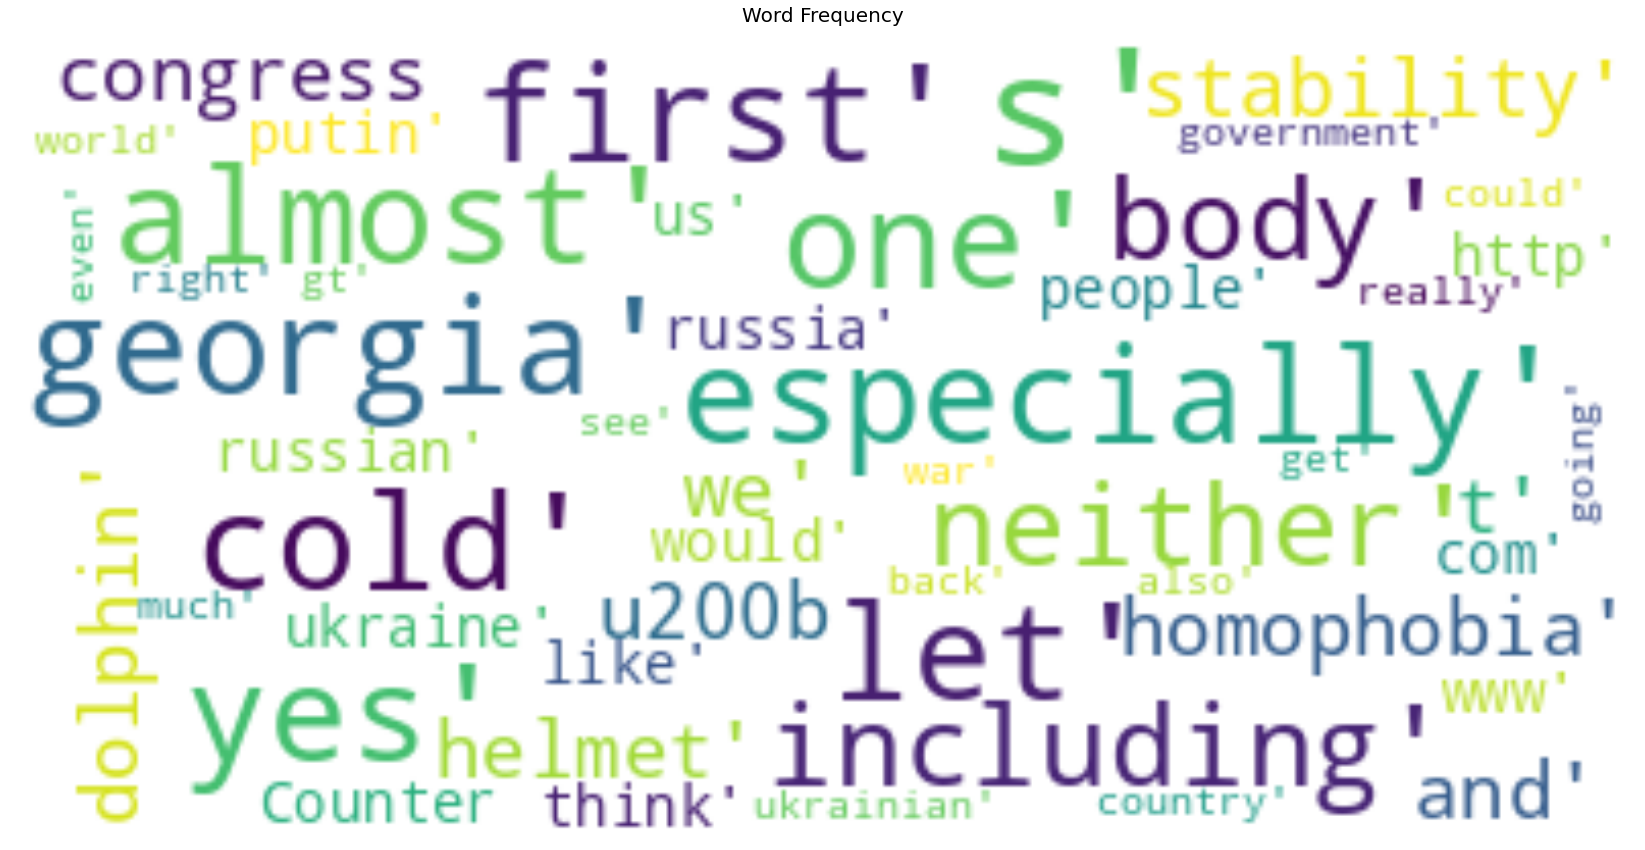

Text(0.5, 1.0, 'Word Frequency')

In [0]:
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax.imshow(gen_wordcloud(count),interpolation="bilinear")
ax.axis("off")
ax.set_title("Word Frequency",fontsize=20)

Out[43]:

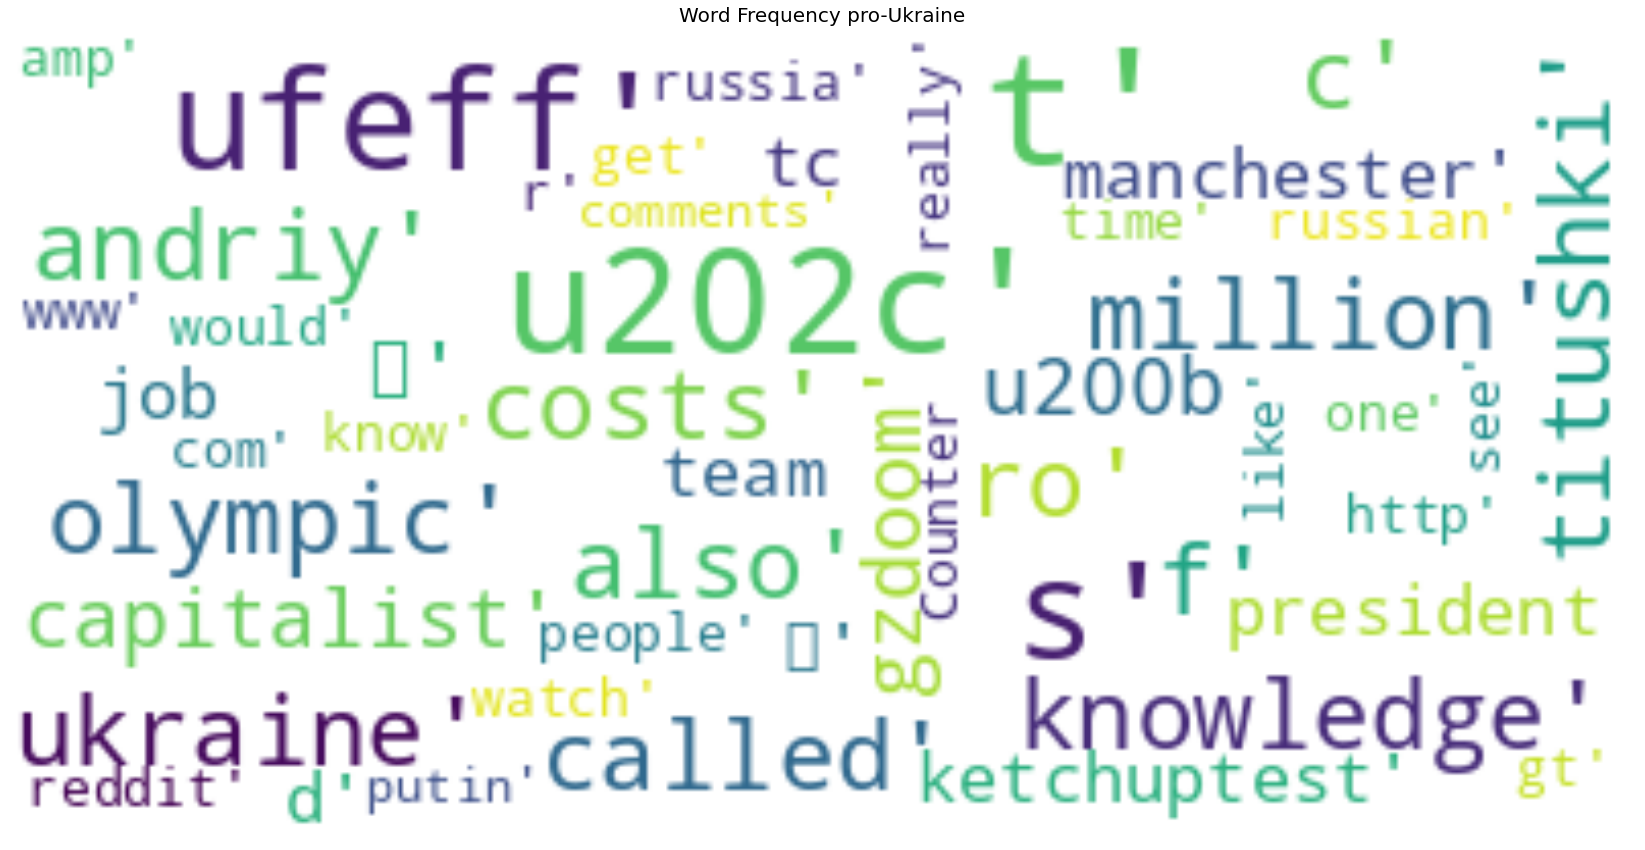

Text(0.5, 1.0, 'Word Frequency pro-Ukraine')

In [0]:
fig,ax=plt.subplots(1,1,figsize=(30,15))
ax.imshow(gen_wordcloud(count_ukr),interpolation="bilinear")
ax.axis("off")
ax.set_title("Word Frequency pro-Ukraine",fontsize=20)